In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#reading the dataset
heart_df=pd.read_csv("heart.csv")
heart_df.shape

(303, 14)

In [3]:
#displaying the top 5 rows
heart_df.head(5)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [5]:
#finding the data-type of each variables
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#finding missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
#number of distinct values in each column
for column in heart_df.columns:
    num_distinct_values = len(heart_df[column].unique())
    print(f"{column}:  {num_distinct_values} distinct values")
                            

age:  41 distinct values
sex:  2 distinct values
cp:  4 distinct values
trtbps:  49 distinct values
chol:  152 distinct values
fbs:  2 distinct values
restecg:  3 distinct values
thalachh:  91 distinct values
exng:  2 distinct values
oldpeak:  40 distinct values
slp:  3 distinct values
caa:  5 distinct values
thall:  4 distinct values
output:  2 distinct values


In [8]:
#duplicate rows
duplicate_rows_data= heart_df[heart_df.duplicated()]
print("number of duplicate rows : ",duplicate_rows_data.shape)

number of duplicate rows :  (1, 14)


In [9]:
#removing duplicates
heart_df=heart_df.drop_duplicates()

In [10]:
#basic data description
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#identifying the categorical variables 
def colm_types(dataframe, cat_th=10):

    # cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]    
    cat_cols = cat_cols + num_but_cat
    

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Variables: {dataframe.shape[1]}")
    print(f'Number of Categorical Variables: {len(cat_cols)}')
    print(f'Number of Numeric Variables: {len(num_cols)}')
    
    
    return cat_cols, num_cols
cat_cols,num_cols= colm_types(heart_df)

Variables: 14
Number of Categorical Variables: 9
Number of Numeric Variables: 5


In [12]:
print(cat_cols)

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


In [13]:
print(num_cols)

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


# data visualisation


In [14]:
#in output variable counting the number of 0s and 1s
count_1 = heart_df['output'].value_counts()


In [15]:
print(count_1)

1    164
0    138
Name: output, dtype: int64


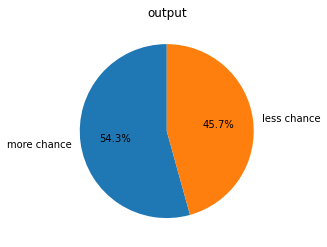

In [16]:
#piechart for output variable
count_out = heart_df['output'].value_counts()
plt.pie(count_out, labels=['more chance','less chance'], autopct='%1.1f%%',startangle=90)
plt.title('output')
plt.show()


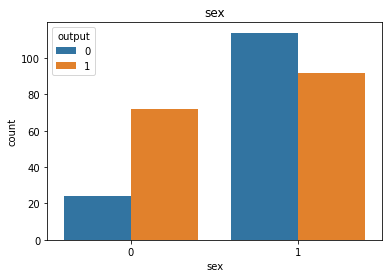

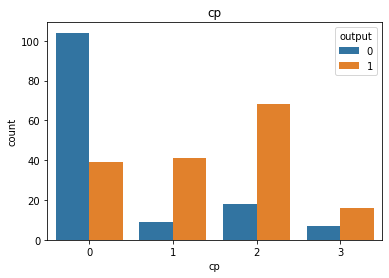

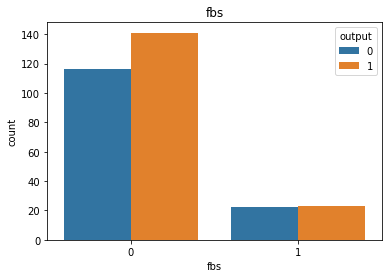

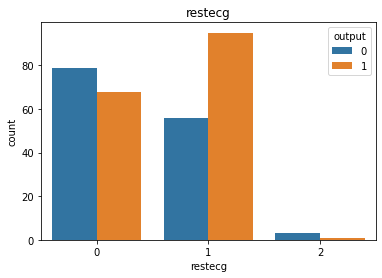

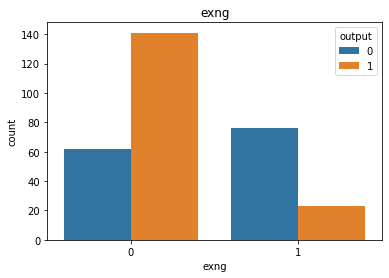

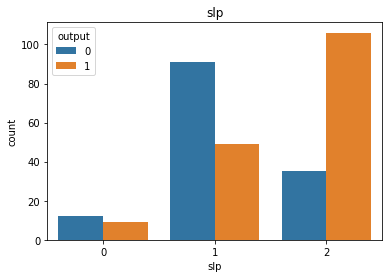

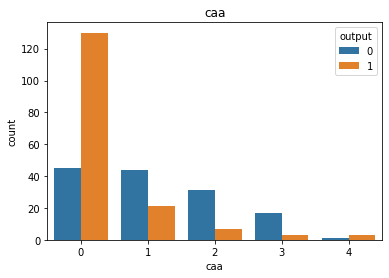

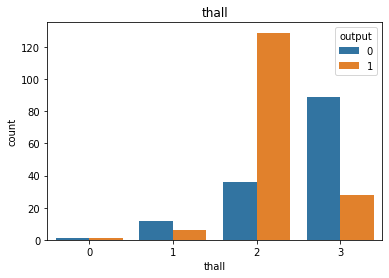

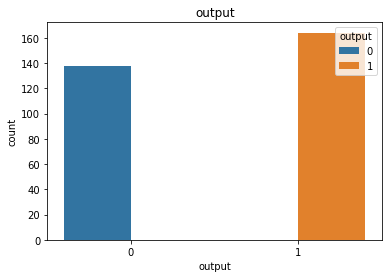

In [17]:
#countplots for all the categorical variables
df_categoric = heart_df.loc[:, cat_cols]
for i in cat_cols:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)


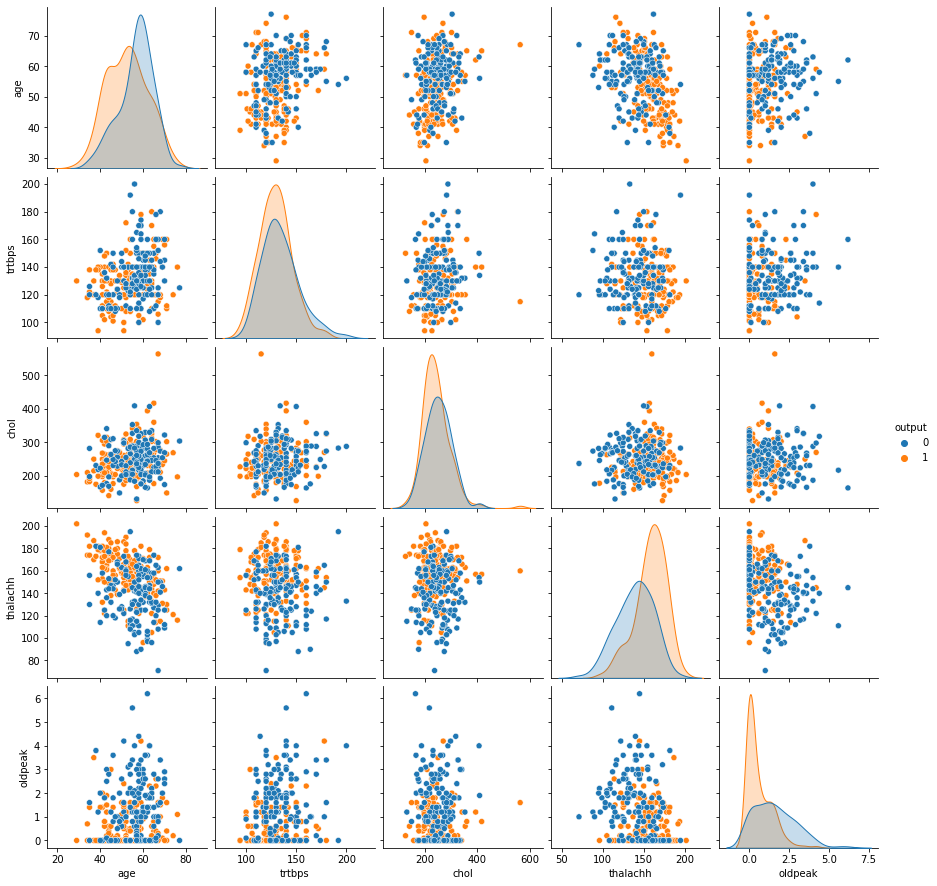

In [18]:
#pai plots for numerical variables
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak','output']
df_numeric = heart_df.loc[:, num_cols]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [19]:
#outlier detection through IQR method
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(heart_df, "output")

(-1.5, 2.5)

In [20]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [21]:
#checking in the dataset
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(heart_df, "output")


Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


In [22]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [23]:
for col in num_cols:
    print(col, check_outlier(heart_df, col))

age False
trtbps True
chol True
thalachh True
oldpeak True
output False


In [24]:
for col in num_cols:
    replace_with_thresholds(heart_df, col)

In [25]:
for col in num_cols:
    print(col, check_outlier(heart_df, col))


age False
trtbps False
chol False
thalachh False
oldpeak False
output False


In [26]:
#scaling the values using standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [27]:
scaled_array = scaler.fit_transform(heart_df[num_cols[:-1]])

In [28]:
pd.DataFrame(scaled_array).describe().T


,count,mean,std,min,25%,50%,75%,max
0,302.0,-2.724090e-16,1.00166,-2.814192,-0.710788,0.119503,0.728383,2.499671
1,302.0,3.678073e-16,1.00166,-2.247491,-0.679121,-0.075902,0.527318,2.336976
2,302.0,-1.312416e-16,1.00166,-2.518079,-0.725132,-0.102874,0.619578,2.636642
3,302.0,-1.963110e-16,1.00166,-2.881347,-0.719941,0.127023,0.720997,2.304928
4,302.0,2.066044e-16,1.00166,-0.927166,-0.927166,-0.205506,0.516154,2.681134


In [29]:
#encoding categorical variables using one-hot encoder
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


In [30]:
import pandas as pd
heart_df=pd.read_csv("heart.csv")

ohe_cols = [col for col in heart_df.columns if 10 >= heart_df[col].nunique() > 2]
ohe_cols


['cp', 'restecg', 'slp', 'caa', 'thall']

In [31]:
new_df=one_hot_encoder(heart_df, ohe_cols)
new_df.head(3)

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,...,0,0,1,0,0,0,0,0,1,0


In [32]:
#creating copy of original dataset
heart_2=new_df.copy()

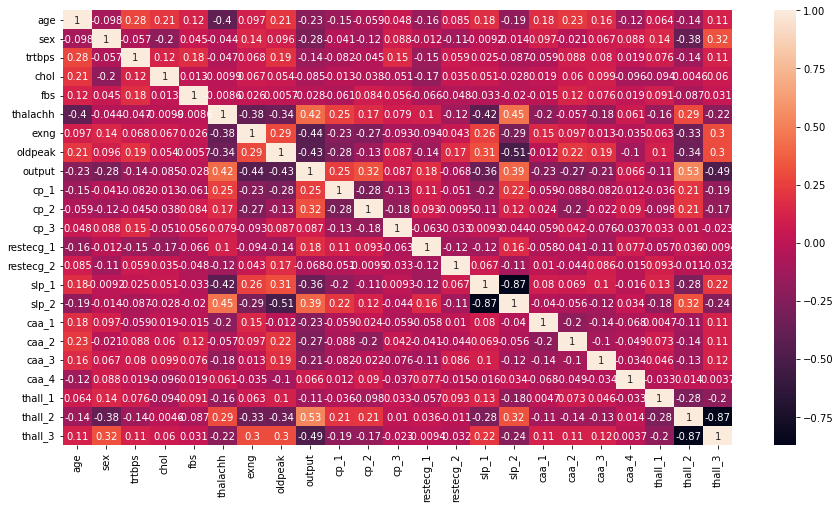

In [33]:
#correlation matrix and heat map
matrix= heart_2.corr()

plt.figure(figsize=(15,8))
plot=sns.heatmap(matrix,annot=True)

In [34]:
#Feature selection
#dropping very low correlated variables with output
X =heart_2.drop(['output','chol','fbs'], axis = 1)


y = heart_2[["output"]]

In [35]:
# dividing the data into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)


In [36]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (242, 20)
X_test: (61, 20)
y_train: (242, 1)
y_test: (61, 1)


In [37]:
#using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [38]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)


In [39]:
knn_classifier.fit(X_train, y_train)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [40]:
y_pred1 = knn_classifier.predict(X_test)


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)



0.7540983606557377

In [42]:
#classification metrics for Knn
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.85      0.67      0.75        33
           1       0.69      0.86      0.76        28

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [43]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_classifier, X_train,y_train, cv=10, scoring='accuracy')
print(scores)

[0.6        0.56       0.66666667 0.70833333 0.54166667 0.58333333
 0.75       0.45833333 0.66666667 0.79166667]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

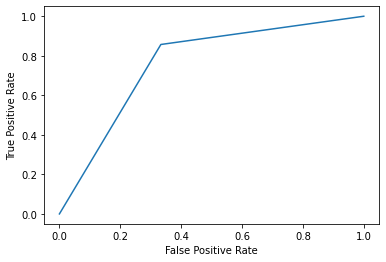

0.7619047619047621


In [44]:
#Roc curve and auc
from sklearn import metrics

fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred1)
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc1 = metrics.roc_auc_score(y_test, y_pred1)
print(auc1)


In [45]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [46]:
y_pred2 = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)




0.8688524590163934

In [47]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train,y_train, cv=10, scoring='accuracy')
print(scores)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.88       0.88       0.79166667 0.83333333 0.83333333 0.70833333
 0.875      0.83333333 0.83333333 0.875     ]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#classification metrics for logistic regression
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



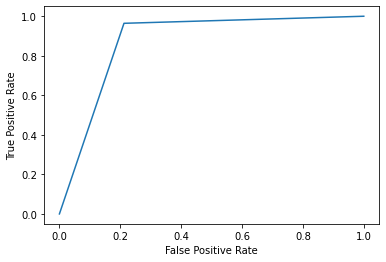

0.8760822510822511


In [49]:
#Roc curve and auc
from sklearn import metrics

fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred2)
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc2= metrics.roc_auc_score(y_test, y_pred2)
print(auc2)


In [50]:
#using SVM classifier
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train) 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [51]:
y_pred3 = clf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)


0.8688524590163934

In [53]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train,y_train, cv=10, scoring='accuracy')
print(scores)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.88       0.84       0.75       0.875      0.83333333 0.70833333
 0.875      0.875      0.79166667 0.91666667]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
#hyper parametric tuning for svm
from sklearn.model_selection import GridSearchCV


In [55]:
param_grid = {'C': [0.1, 1, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


In [56]:
grid.fit(X_train, y_train)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END .....C=0.1, ga

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 5/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ..........

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.612 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.708 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 4/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END ......C=100, ga

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.708 total time=   0.0s
[CV 1/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.771 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END C=100, gamma=0.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END .....C=1000, g

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.729 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.571 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.896 total time=   0.0s
[CV 5/5] END ..C=1000, 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [57]:
#best parameters display
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [58]:
# classification metrics for svm
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       1.00      0.76      0.86        33
           1       0.78      1.00      0.88        28

    accuracy                           0.87        61
   macro avg       0.89      0.88      0.87        61
weighted avg       0.90      0.87      0.87        61



In [59]:
accuracy_score(y_test,grid_predictions)


0.8688524590163934

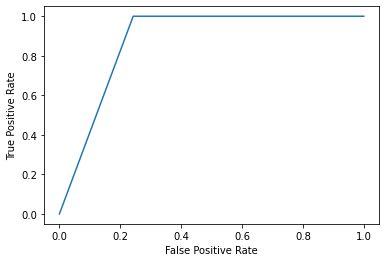

0.8787878787878788


In [60]:
#roc curve and auc
fpr3, tpr3, _ = metrics.roc_curve(y_test,grid_predictions )
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc3 = metrics.roc_auc_score(y_test, grid_predictions)
print(auc3)


In [61]:
#importing xgboost classifier
import xgboost as xgb


In [62]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
y_pred4 = my_model.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred4)


0.8852459016393442

In [65]:
#cross validation for xgboost
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_model, X_train,y_train, cv=10, scoring='accuracy')
print(scores)

[0.76       0.8        0.625      0.75       0.83333333 0.625
 0.83333333 0.79166667 0.75       0.875     ]


In [66]:
#classification metrics
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



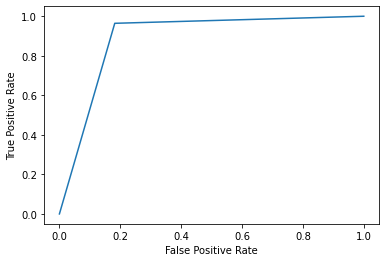

0.8912337662337663


In [67]:
#roc  curve and auc
fpr4, tpr4, _ = metrics.roc_curve(y_test,y_pred4 )
plt.plot(fpr4,tpr4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc4 = metrics.roc_auc_score(y_test, y_pred4)
print(auc4)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be re

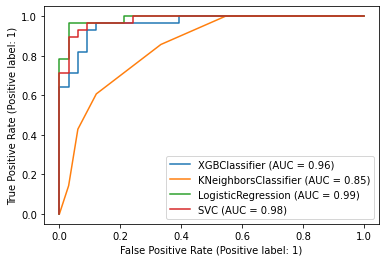

In [68]:
#roc curves of all the models together
from sklearn.metrics import plot_roc_curve
disp =plot_roc_curve(my_model,X_test,y_test)
plot_roc_curve(knn_classifier,X_test,y_test,ax=disp.ax_);
plot_roc_curve(logreg,X_test,y_test,ax=disp.ax_);
plot_roc_curve(clf,X_test,y_test,ax=disp.ax_);